In [1]:
import numpy       as np
import pandas      as pd
import seaborn     as sb
import altair      as alt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.cluster import KMeans

pd.set_option('display.max_columns', 100)
alt.data_transformers.disable_max_rows();

In [2]:
df = pd.read_csv("../data/macros.csv", index_col="Uniprot Code")
df["Longitud"] = df.Secuencia.str.len() # Add lenght column
df

,Tipo de Macro,Secuencia,Longitud
Uniprot Code,,,
O28751,AF-1521-like,MEVLFEAKVGDITLKLAQGDITQYPAKAIVNAANKRLEHGGGVAYA...,192
D3RWS7,AF-1521-like,MEVEVVRELEMDKLKVKLAGGDITKYPAEAIVNAANKYLEHGGGVA...,193
D2RH24,AF-1521-like,MVVKKFGSVEVVLEKGDITKYPAEAIVNAANKYLEHGGGVALAIAK...,193
A0A0F7ICE9,AF-1521-like,MKPEVVLRFSGVEVRLVQGDITKYPAEAIVNAANRHLEHGGGVAYA...,194
A0A075LQ95,AF-1521-like,MNLTELTFGNLTFKLAQGDITKLPAEAIVNAANKYLEHGGGVALAI...,190
...,...,...,...
P0C6Y5,Virus-type,MSSKQFKILVNEDYQVNVPSLPIRDVLQEIKYCYRNGFEGYVFVPE...,6684
A0A0P0LKV0,Virus-type,MACNRFTLAVASDSEISGTGCATVAQAVRLYSEAAVNGFRACRFVS...,6763
A0A0U2GMU3,Virus-type,MACNRVTLAVASDTEISATGCSTIALAVRRYSEAASNGFRACRFVS...,6763


# Número de secuencias por grupo

In [3]:
bars = alt.Chart(df).mark_bar().encode(
    x='count(y):Q',
    y=alt.Y('Tipo de Macro:N', sort='-x')
)

text = bars.mark_text(align='left',baseline='middle',dx=3).encode(text='count(y):Q')
(bars + text).properties(height=300)

alt.LayerChart(...)

# Longitudes de secuencias por tipo

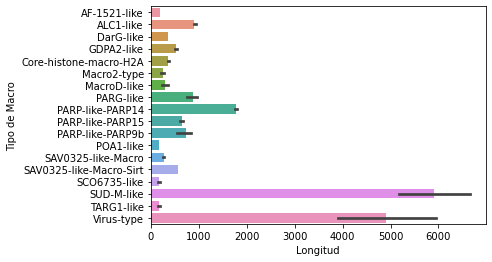

In [4]:
sb.barplot(y="Tipo de Macro", x="Longitud", data=df);

# Count Vectorizer

In [5]:
bow = CountVectorizer(analyzer='char', lowercase=False, ngram_range=(1, 1))
df_count = bow.fit_transform(df.Secuencia)
tokens = bow.get_feature_names()

print("Aminoacids:", len(tokens), tokens)
df_count = pd.DataFrame(data=df_count.toarray(), index=df.index, columns=tokens)
df_count["Tipo de Macro"] = df["Tipo de Macro"]
df_count.head()

Aminoacids: 21 ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'X', 'Y']


,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,X,Y,Tipo de Macro
Uniprot Code,,,,,,,,,,,,,,,,,,,,,,
O28751,24,3,7,21,8,17,3,11,18,15,5,4,5,3,6,8,6,19,1,0,8,AF-1521-like
D3RWS7,22,3,7,25,5,14,4,12,23,14,5,4,6,1,7,6,6,20,1,0,8,AF-1521-like
D2RH24,21,3,7,21,10,15,3,12,24,14,3,7,8,2,3,5,5,22,1,0,7,AF-1521-like
A0A0F7ICE9,21,3,3,24,6,16,4,11,13,16,4,5,7,3,13,9,5,22,1,0,8,AF-1521-like
A0A075LQ95,22,2,4,20,6,18,4,15,19,19,3,8,6,2,5,7,7,14,1,0,8,AF-1521-like


# Term Frequency Vectorizer
- **norm="l1"** -> The sum of values of a row is 1

In [6]:
tf = TfidfVectorizer(analyzer='char', use_idf=False, norm="l1", lowercase=False, ngram_range=(1, 1))
df_tf = tf.fit_transform(df.Secuencia)
tokens = tf.get_feature_names()

df_tf = pd.DataFrame(data=df_tf.toarray(), index=df.index, columns=tokens)
df_tf.head()

,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,X,Y
Uniprot Code,,,,,,,,,,,,,,,,,,,,,
O28751,0.125000,0.015625,0.036458,0.109375,0.041667,0.088542,0.015625,0.057292,0.093750,0.078125,0.026042,0.020833,0.026042,0.015625,0.031250,0.041667,0.031250,0.098958,0.005208,0.0,0.041667
D3RWS7,0.113990,0.015544,0.036269,0.129534,0.025907,0.072539,0.020725,0.062176,0.119171,0.072539,0.025907,0.020725,0.031088,0.005181,0.036269,0.031088,0.031088,0.103627,0.005181,0.0,0.041451
D2RH24,0.108808,0.015544,0.036269,0.108808,0.051813,0.077720,0.015544,0.062176,0.124352,0.072539,0.015544,0.036269,0.041451,0.010363,0.015544,0.025907,0.025907,0.113990,0.005181,0.0,0.036269
A0A0F7ICE9,0.108247,0.015464,0.015464,0.123711,0.030928,0.082474,0.020619,0.056701,0.067010,0.082474,0.020619,0.025773,0.036082,0.015464,0.067010,0.046392,0.025773,0.113402,0.005155,0.0,0.041237
A0A075LQ95,0.115789,0.010526,0.021053,0.105263,0.031579,0.094737,0.021053,0.078947,0.100000,0.100000,0.015789,0.042105,0.031579,0.010526,0.026316,0.036842,0.036842,0.073684,0.005263,0.0,0.042105


# Plot embeddings

In [37]:
def plot_multidimensional(x, y, method):

    # Libraries
    from sklearn.decomposition import PCA
    from sklearn.manifold import TSNE
    import umap
    
    # Compute
    if method=="pca":    comps = PCA().fit_transform(x)
    elif method=="tsne": comps = TSNE().fit_transform(x)
    elif method=="umap": comps = umap.UMAP().fit_transform(x)
    
    df_dimRed = pd.DataFrame({'Componente 1': comps[:, 0],  'Componente 2': comps[:, 1], "y": y})

    
    # Plot
    selection = alt.selection_multi(fields=['y'])
    color = alt.condition(selection, alt.Color('y:N', legend=None), alt.value('lightgray'))

    base = alt.Chart(df_dimRed).add_selection(selection)

    scatter = base.mark_circle(size=60).encode(
        x="Componente 1", y="Componente 2", color=color, tooltip="y"
    ).properties( width=400, height=400).interactive()

    legend = base.mark_rect().encode(
        y=alt.Y('y:N', axis=alt.Axis(orient='right')),
        color=color
    )

    return scatter | legend

In [38]:
plot_multidimensional(df_tf, df["Tipo de Macro"], method="pca")

alt.HConcatChart(...)

In [35]:
plot_multidimensional(df_tf, df["Tipo de Macro"], method="tsne")

alt.HConcatChart(...)

In [36]:
plot_multidimensional(df_tf, df["Tipo de Macro"], method="umap")

alt.HConcatChart(...)

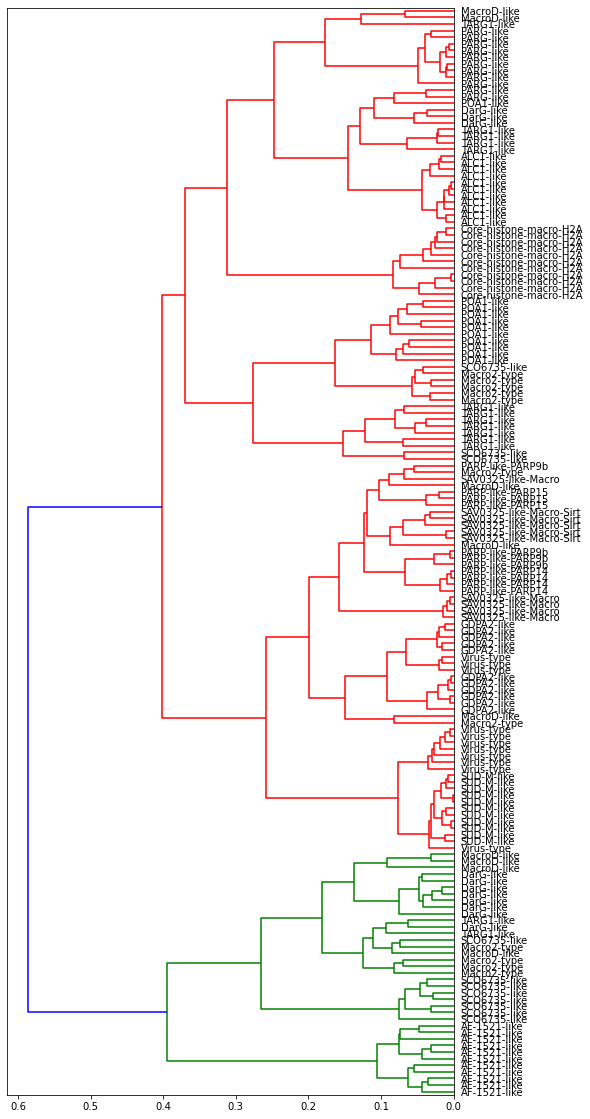

In [10]:
from matplotlib import pyplot as plt
from scipy.cluster import hierarchy

plt.figure(figsize=(8,20))
Z = hierarchy.linkage(df_tf.drop(columns=["Tipo de Macro"]), 'ward')
hierarchy.dendrogram(Z, orientation="left", leaf_font_size=10, labels=df_tf["Tipo de Macro"].values);